Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

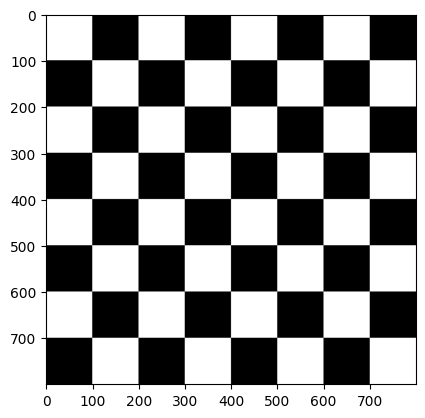

In [2]:
ancho = 800
alto = 800

# Create a grayscale image (single channel) initialized to black
chess_img = np.zeros((alto, ancho, 1), dtype = np.uint8)

# First row of blocks
chess_img[0:100, 0:100, 0] = 255      # Top-left corner block
chess_img[0:100, 200:300, 0] = 255    # Top row, second block (skip 100 pixels)
chess_img[0:100, 400:500, 0] = 255    # Top row, third block
chess_img[0:100, 600:700, 0] = 255    # Top row, fourth block

# Second row of blocks
chess_img[100:200, 100:200, 0] = 255  # Start from x=100 to alternate pattern
chess_img[100:200, 300:400, 0] = 255
chess_img[100:200, 500:600, 0] = 255
chess_img[100:200, 700:800, 0] = 255

# Third row
chess_img[200:300, 0:100, 0] = 255
chess_img[200:300, 200:300, 0] = 255
chess_img[200:300, 400:500, 0] = 255
chess_img[200:300, 600:700, 0] = 255

# Fourth row
chess_img[300:400, 100:200, 0] = 255
chess_img[300:400, 300:400, 0] = 255
chess_img[300:400, 500:600, 0] = 255
chess_img[300:400, 700:800, 0] = 255

# Fifth row
chess_img[400:500, 0:100, 0] = 255
chess_img[400:500, 200:300, 0] = 255
chess_img[400:500, 400:500, 0] = 255
chess_img[400:500, 600:700, 0] = 255 

# Sixth row
chess_img[500:600, 100:200, 0] = 255
chess_img[500:600, 300:400, 0] = 255
chess_img[500:600, 500:600, 0] = 255
chess_img[500:600, 700:800, 0] = 255

# Seventh row
chess_img[600:700, 0:100, 0] = 255
chess_img[600:700, 200:300, 0] = 255
chess_img[600:700, 400:500, 0] = 255
chess_img[600:700, 600:700, 0] = 255 

# Eighth row
chess_img[700:800, 100:200, 0] = 255
chess_img[700:800, 300:400, 0] = 255
chess_img[700:800, 500:600, 0] = 255
chess_img[700:800, 700:800, 0] = 255

# Display the grayscale checkerboard image
plt.imshow(chess_img, cmap='gray')

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ ) con las funciones de dibujo de OpenCV

In [ ]:
alto = 600
ancho = 600

# Create a white RGB image
mondrian_img = np.zeros((alto, ancho, 3), dtype=np.uint8) 
mondrian_img[:,:,:] = 255

# Vertical lines
cv2.line(mondrian_img, (200, 0), (200, alto), (0,0,0), 8)      # Black vertical line at x=200
cv2.line(mondrian_img, (520, 600), (520, 400), (0,0,0), 10)   # Black vertical line from bottom to y=400

# Horizontal lines
cv2.line(mondrian_img, (0, 400), (ancho, 400), (0,0,0), 15)  # Black horizontal line at y=400
cv2.line(mondrian_img, (0, 200), (200, 200), (0,0,0), 12)    # Black horizontal line from x=0 to x=200 at y=200

# Colored rectangles (filled)
cv2.rectangle(mondrian_img,(205, 0),(ancho,395),(255,0,0),-1)    # Red rectangle
cv2.rectangle(mondrian_img,(0,407),(195,600),(0,0,255),-1)       # Blue rectangle
cv2.rectangle(mondrian_img,(520,400),(600,500),(0,0,0),-1)       # Black rectangle
cv2.rectangle(mondrian_img,(525,500),(600,600),(255,255,0),-1)   # Yellow rectangle

# Display the image
plt.imshow(mondrian_img)

TAREA: Modifica de forma libre los valores de un plano de la imagen

In [ ]:
vid = cv2.VideoCapture(0)

while True:      
    ret, frame = vid.read()
    if not ret:
        break

    #Modify channels
    frame_mod = frame.copy()
    frame_mod[:,:,2] = 255                   
    frame_mod[:,:,1] = frame_mod[:,:,1] // 2 
    frame_mod[:,:,0] = frame_mod[:,:,0] // 2

    # Split channels to show in collage
    r = frame_mod[:,:,2]
    g = frame_mod[:,:,1]
    b = frame_mod[:,:,0]

    # Put images side by side
    collage = np.hstack((r, g, b))

    # Show resized image
    h, w, c = frame.shape
    cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5), int(h/2)), cv2.INTER_NEAREST))

    # Exit with ESC
    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()


2025-09-24 15:03:21.272 python[5438:577823] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


KeyboardInterrupt: 

TAREA: Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [ ]:
# Global variables for mouse position and RGB values
px, py = -1, -1
R, G, B = 0, 0, 0

# Mouse callback function
def mouse_events(event, x, y, flags, param):
    global px, py, R, G, B
    if event == cv2.EVENT_MOUSEMOVE:
        px, py = x, y
        # Read the BGR values of the pixel under the cursor
        B = frame[y, x, 0]
        G = frame[y, x, 1]
        R = frame[y, x, 2]

# Load the image
filename = 'pop-art.jpg'  # Replace with your file name
frame = cv2.imread(filename)
if frame is None:
    print("Image not found!")
    exit()

# Find the brightest and darkest pixels using grayscale conversion
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray)

# Find brightest and darkest 8x8 areas
h, w = gray.shape
max_avg = -1
min_avg = 256
max_area_loc = (0, 0)
min_area_loc = (0, 0)

for y in range(h - 7):
    for x in range(w - 7):
        # Calculate average brightness of 8x8 area
        area_avg = np.mean(gray[y:y+8, x:x+8])
        if area_avg > max_avg:
            max_avg = area_avg
            max_area_loc = (x + 4, y + 4)  # Center of the area
        if area_avg < min_avg:
            min_avg = area_avg
            min_area_loc = (x + 4, y + 4)  # Center of the area

# Create a window and set the mouse callback
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', mouse_events)
font = cv2.FONT_HERSHEY_SIMPLEX

while True:
    # Create a copy of the original frame to draw circles and text without altering the original
    temp_frame = frame.copy()

    # Draw circles on the brightest (red) and darkest (blue) pixels
    cv2.circle(temp_frame, max_loc, 5, (0,0,255), 2)  # Red = brightest pixel
    cv2.circle(temp_frame, min_loc, 5, (255,0,0), 2)  # Blue = darkest pixel
    
    # Draw circles on the brightest (green) and darkest (yellow) 8x8 areas
    cv2.circle(temp_frame, max_area_loc, 5, (0,255,0), 2)  # Green = brightest area
    cv2.circle(temp_frame, min_area_loc, 5, (0,255,255), 2)  # Yellow = darkest area

    # Display RGB values next to the cursor
    if px != -1:
        cv2.putText(temp_frame, f'R:{R}', (px+10, py-10), font, 0.5, (0,0,255), 1)
        cv2.putText(temp_frame, f'G:{G}', (px+10, py+5), font, 0.5, (0,255,0), 1)
        cv2.putText(temp_frame, f'B:{B}', (px+10, py+20), font, 0.5, (255,0,0), 1)

    # Show the updated image with circles and RGB values
    cv2.imshow('Image', temp_frame)

   # Exit the loop when ESC is pressed
    if cv2.waitKey(20) == 27:
        break

# Close all OpenCV windows
cv2.destroyAllWindows()

TAREA: Llevar a cabo una propuesta propia de pop art

In [ ]:
vid = cv2.VideoCapture(0)

# Camera dimensions
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Force half resolution to use less screen space
w = int(w/2)
h = int(h/2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w)  # On Mac these commands don't work
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

# Final image 2x original (collage)
collage = np.zeros((h*2, w*2, 3), dtype=np.uint8)
tl = collage[0:h, 0:w]
tr = collage[0:h, w:w+w]
bl = collage[h:h+h, 0:w]
br = collage[h:h+h, w:w+w]

while True:      
    # Frame by frame
    ret, frameIN = vid.read()

    # Resize to smaller size
    frame = cv2.resize(frameIN, (int(w), int(h)), cv2.INTER_NEAREST)

    if ret:
        # Separate color channels
        r = frame[:,:,2]
        g = frame[:,:,1]
        b = frame[:,:,0]

        # Play with color planes
        tl[:,:,0] = 210 - b
        tl[:,:,1] = g + 90
        tl[:,:,2] = b

        tr[:,:,0] = 90 - r*4 
        tr[:,:,1] = r
        tr[:,:,2] = r
        
        bl[:,:,0] = r
        bl[:,:,1] = b
        bl[:,:,2] = 180 - g*2

        br[:,:,0] = b
        br[:,:,1] = 100 - g
        br[:,:,2] = g
    
        # Show composition
        cv2.imshow('Cam', collage)
    
    # Stop when ESC is pressed
    if cv2.waitKey(20) == 27:
        break
  
# Release capture object
vid.release()
# Destroy all windows
cv2.destroyAllWindows()